###### U20EC147
# Experiment 7
### Aim : Design an quadratic regression model using tensorflow

In [1]:
import tensorflow as tf

In [2]:
a = tf.constant([[1, 2., 3],
                 [4, 5, 6]])
a

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
a.shape, a.dtype

(TensorShape([2, 3]), tf.float32)

In [4]:
a + a

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [5]:
5 * a

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

In [6]:
a @ tf.transpose(a)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [7]:
tf.concat([a,a,a], axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [8]:
tf.nn.softmax(a, axis=-1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.66524094],
       [0.09003057, 0.24472848, 0.66524094]], dtype=float32)>

In [9]:
tf.reduce_sum(a)

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

In [10]:
tf.convert_to_tensor([1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [11]:
tf.reduce_sum([1,2,3])

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [12]:
var = tf.Variable([0.,0.,0.])

In [13]:
var.assign([1,2,3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [14]:
var.assign_add([1,1,1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

In [15]:
x = tf.Variable(1.)

def f(x):
    y = x**2 + 2*x - 5
    return y

In [16]:
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

In [17]:
with tf.GradientTape() as tape:
    y = f(x)
g_x = tape.gradient(y,x)
g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [18]:
class MyModule (tf.Module):
    def __init__(self, value):
        self.weight = tf.Variable(value)

    @ tf.function
    def multiply(self, x):
        return x * self.weight

In [19]:
mod = MyModule(3)
mod.multiply(tf.constant([1,2,3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

In [20]:
tf.saved_model.save(mod, './saved')

In [21]:
model = tf.saved_model.load('./saved')
model.multiply(tf.constant([1,2,3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

In [22]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize']=[9,6]


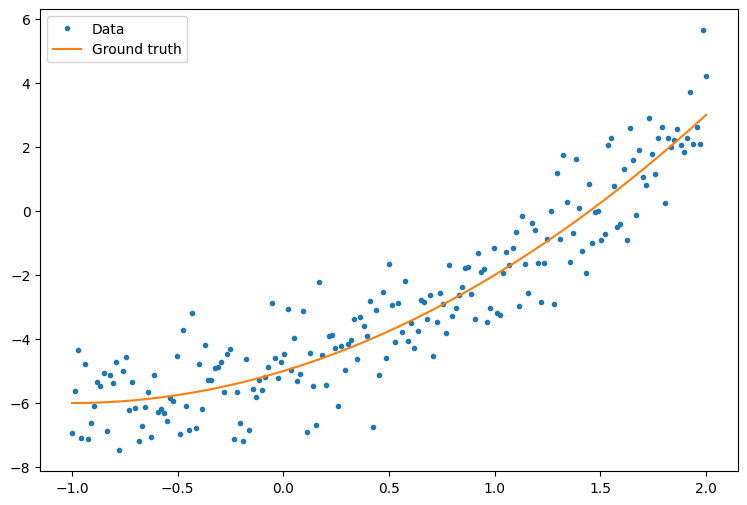

In [23]:
x=tf.linspace(-1,2,201)
x=tf.cast(x,tf.float32)

def f(x):
   y = x**2 + 2*x - 5
   return y

y=f(x)+tf.random.normal(shape=[201])

plt.plot(x.numpy(),y.numpy(),'.', label='Data')
plt.plot(x,f(x),label='Ground truth')
plt.legend()

In [24]:
class Model(tf.Module):
  def __init__(self):
    rand_init=tf.random.uniform(shape=[3],minval=0.,maxval=5.,seed=22)
    self.w_q=tf.Variable(rand_init[0])
    self.w_l=tf.Variable(rand_init[1])
    self.b=tf.Variable(rand_init[2])

  @tf.function
  def __call__(self,x):
    return self.w_q * (x**2) +self.w_l *x +self.b

In [25]:
quad_model=Model()

In [26]:
def plot_preds(x,y,f,model,title):
  plt.figure()
  plt.plot(x,y,'.',label='Data')
  plt.plot(x,f(x),label='Grond truth')
  plt.plot(x,model(x),label='Predictions')
  plt.title(title)
  plt.legend()

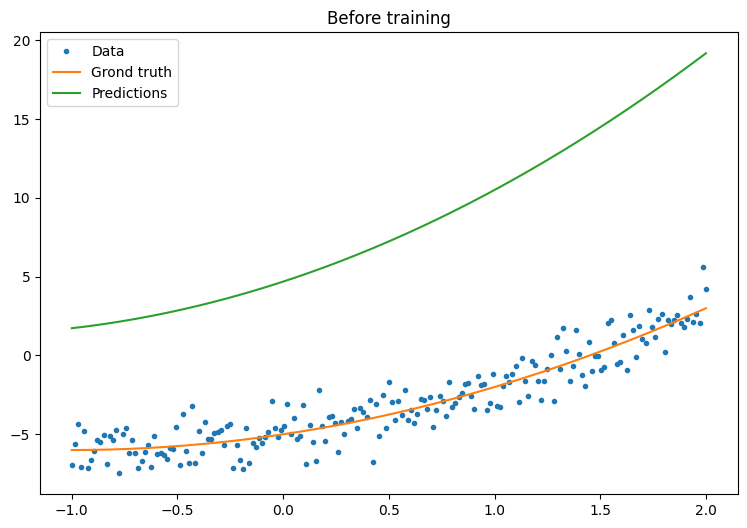

In [27]:
plot_preds(x,y,f,quad_model,'Before training')

In [28]:
def mse_loss(y_pred,y):
  return tf.reduce_mean(tf.square(y_pred-y))

In [29]:
batch_size=32
dataset=tf.data.Dataset.from_tensor_slices((x,y))
dataset=dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

Mean squared error for step0:65.534
Mean squared error for step10:8.197
Mean squared error for step20:3.348
Mean squared error for step30:1.982
Mean squared error for step40:1.505
Mean squared error for step50:1.291
Mean squared error for step60:1.183
Mean squared error for step70:1.121
Mean squared error for step80:1.085
Mean squared error for step90:1.065
/n


Text(0.5, 1.0, 'MSE LOSS VS Training')

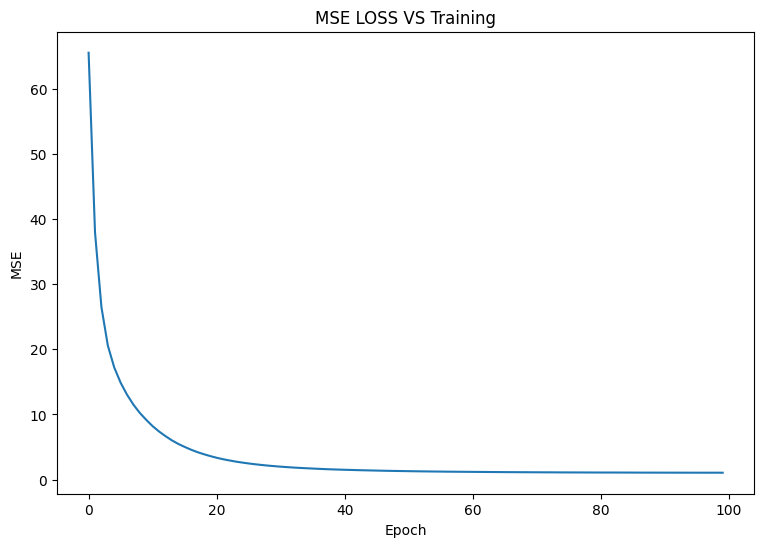

In [30]:
epochs=100
learning_rate=0.01
losses=[]
for epoch in range(epochs):
  for x_batch, y_batch in dataset:
    with tf.GradientTape() as tape:
      batch_loss=mse_loss(quad_model(x_batch),y_batch)
    grads=tape.gradient(batch_loss,quad_model.variables)
    for g,v in zip(grads,quad_model.variables):
      v.assign_sub(learning_rate*g)
  loss=mse_loss(quad_model(x),y)
  losses.append(loss)
  if epoch % 10==0:
    print(f'Mean squared error for step{epoch}:{loss.numpy():0.3f}')
print("/n")
plt.plot(range(epochs),losses)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("MSE LOSS VS Training")